## Ejemplo de dataframe con strings

In [1]:
import pandas as pd

df1 = pd.read_excel('datos (1) corregido.xlsx', skiprows=0)   

forzada_delitos = df1[['Entidadad federativa', 
                       '01/01/2025_Desaparición forzada de personas_Delitos',
                       '01/02/2025_Desaparicion forzada de personas_Delitos',
                       '01/03/2025_Desaparicion forzada de personas_Delitos',
                       ]]

# Renombrar las columnas del DataFrame forzada_delitos
forzada_delitos.columns = ['Entidad Federativa', 'Enero', 'Febrero', 'Marzo']

# Transformar el DataFrame forzada_delitos a formato long
forzada_delitos_long = pd.melt(
    forzada_delitos,
    id_vars=['Entidad Federativa'],  # Columnas que se mantendrán como identificadores
    var_name='Mes',                 # Nombre de la nueva columna que contendrá los nombres de las columnas originales
    value_name='Delitos'            # Nombre de la nueva columna que contendrá los valores
)

# Mostrar el DataFrame transformado
forzada_delitos_long

,Entidad Federativa,Mes,Delitos
0,Aguascalientes,Enero,0
1,Baja California,Enero,1
2,Baja California Sur,Enero,0
3,Campeche,Enero,0
4,Chiapas,Enero,1
...,...,...,...
97,Veracruz,Marzo,0
98,Yucatán,Marzo,0
99,Zacatecas,Marzo,0
100,Nacional,Marzo,11


## Ejemplo de dataframe con fechas

In [2]:
import pandas as pd
import numpy as np

# Generar un rango de fechas
fechas = pd.date_range(start="2025-01-01", end="2025-12-31", freq="ME")

# Crear un DataFrame con datos aleatorios
data = {
    'Fecha': np.random.choice(fechas, size=1000),  # Seleccionar 1000 fechas aleatorias
    'Desaparecidos': np.random.randint(0, 100, size=1000),
    'Localizados': np.random.randint(0, 100, size=1000),
    'No localizados': np.random.randint(0, 100, size=1000)
}

df_fechas = pd.DataFrame(data)

# Transformar el DataFrame a formato long
df_fechas_long = pd.melt(
    df_fechas,
    id_vars=['Fecha'],  # Usar las fechas como identificadores
    var_name='Clasificación',     # Nombre de la nueva columna que contendrá los nombres de las columnas originales
    value_name='Cantidad'  # Nombre de la nueva columna que contendrá los valores
)

df_fechas_long = df_fechas_long.drop_duplicates()

df_fechas_long = df_fechas_long.fillna(0)

df_fechas_long = df_fechas_long.groupby(['Fecha', 'Clasificación'], as_index=False)['Cantidad'].sum()

df_fechas_long

,Fecha,Clasificación,Cantidad
0,2025-01-31,Desaparecidos,3120
1,2025-01-31,Localizados,3020
2,2025-01-31,No localizados,3081
3,2025-02-28,Desaparecidos,2792
4,2025-02-28,Localizados,2746
5,2025-02-28,No localizados,2611
6,2025-03-31,Desaparecidos,2255
7,2025-03-31,Localizados,2175
8,2025-03-31,No localizados,2614
9,2025-04-30,Desaparecidos,2940


## Código a copiar:

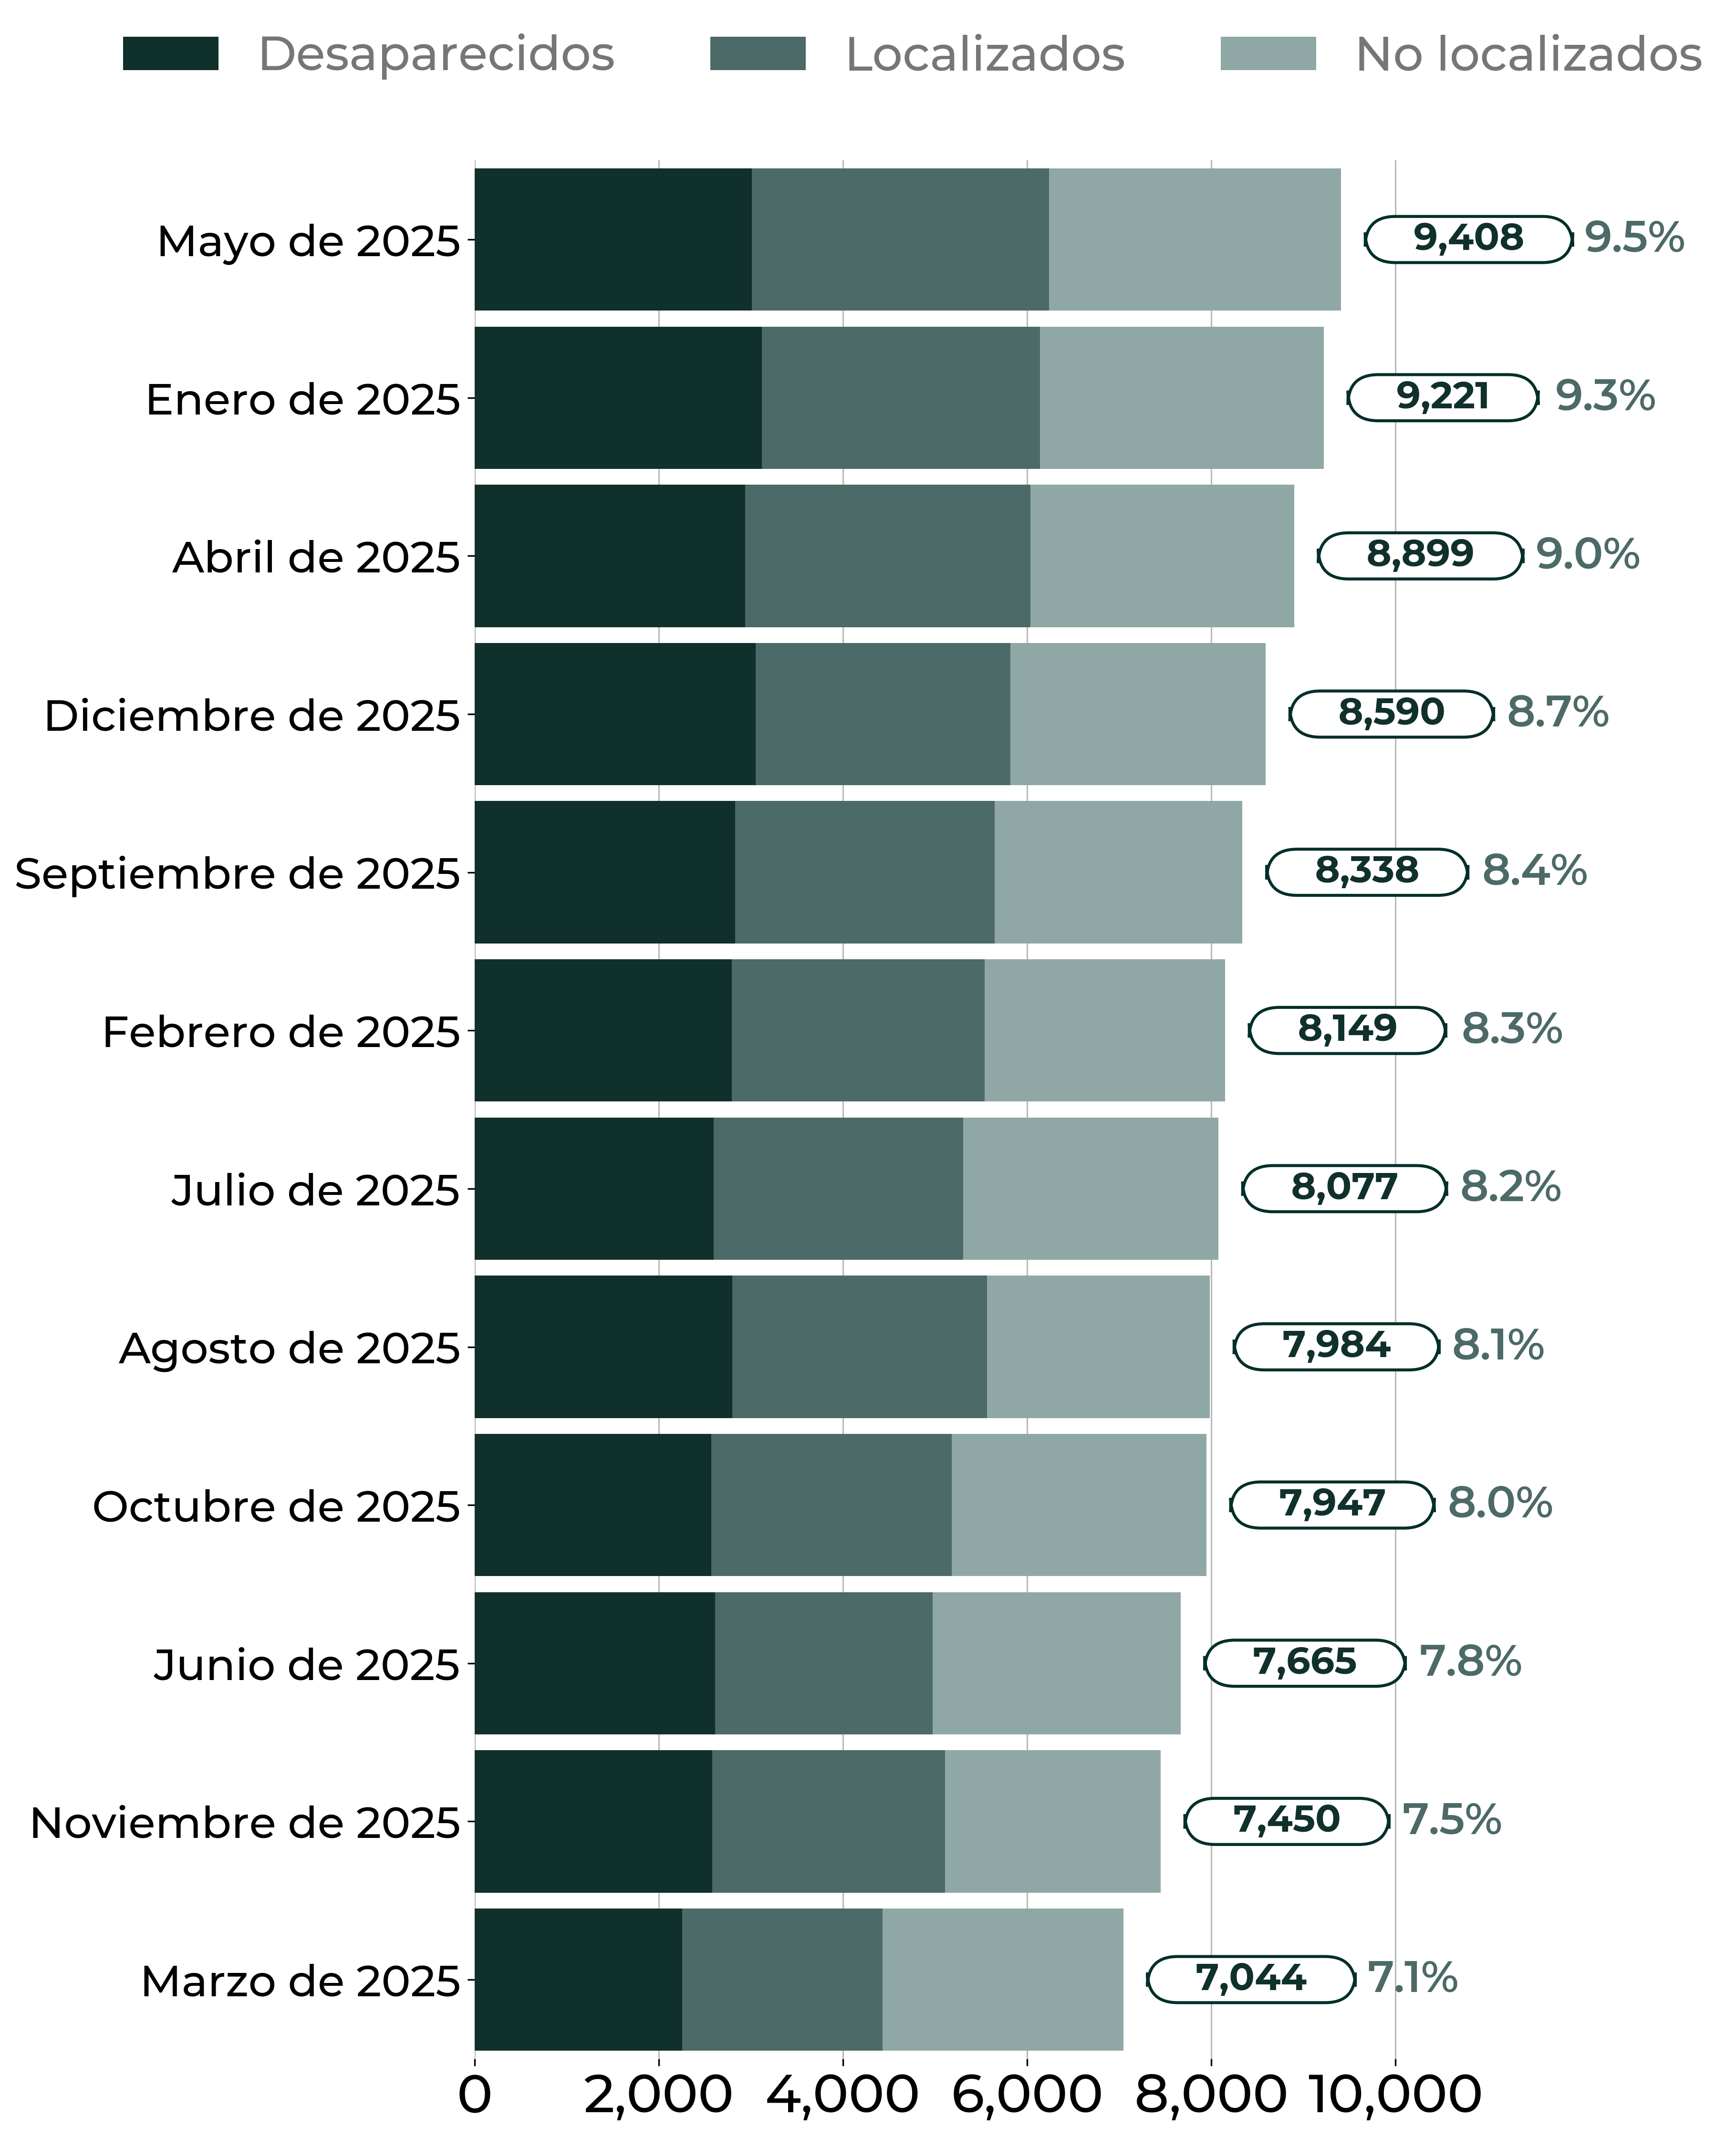

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path
from babel.dates import format_date
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

def barras_apiladas_horizontales(df_long, bar_height=0.5, nombre=None, porcentaje_barra=False, valor_barra=False, porcentaje_total=False):
    # Configuración de la fuente
    font_config = {
        'family': 'Montserrat',
        'variable_x': {'size': 27, 'weight': 'medium', 'color': '#000000'},
        'variable_y': {'size': 22, 'weight': 'medium', 'color': '#000000'},
        'valor_capsula': {'size': 19, 'weight': 'bold', 'color': '#10302C'},
        'valor_porcentaje_barra': {'size': 15, 'weight': 'medium', 'color': '#ffffff'},
        'porcentaje_total': {'size': 22, 'weight': 'semibold', 'color': '#4C6A67'},
        'leyenda': {'size': 24, 'weight': 'medium', 'color': '#767676'}
    }

    # Configurar las fuentes SVG como texto editable
    plt.rcParams['svg.fonttype'] = 'none'

    # Ruta relativa para las fuentes
    font_dirs = [Path("../0_fonts")]
    font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
    for font_file in font_files:
        font_manager.fontManager.addfont(font_file)

    nombre_df = nombre or "barras_apiladas_horizontales"

    # Colores personalizados
    colores_asignados = ["#10302C", "#4C6A67", "#8FA8A6", "#A3C9A8"]

    # Pivotear el DataFrame y calcular totales
    df_pivot = df_long.pivot(index=df_long.columns[0], columns=df_long.columns[1], values=df_long.columns[2]).fillna(0)
    suma_total = df_pivot.sum(axis=1).sort_values(ascending=False)
    df_pivot = df_pivot.loc[suma_total.index]
    total_general = suma_total.sum()

    # Convertir las fechas al formato deseado
    meses = {
        1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril", 5: "Mayo", 6: "Junio",
        7: "Julio", 8: "Agosto", 9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
    }

    entidades = df_pivot.index.values
    # Verificar si las entidades son fechas y convertirlas al formato deseado
    if hasattr(df_pivot.index, "dtype") and str(df_pivot.index.dtype).startswith("datetime"):
        entidades_formateadas = [f"{meses[pd.Timestamp(date).month]} de {pd.Timestamp(date).year}" for date in entidades]
    else:
        entidades_formateadas = entidades

    valores = [df_pivot[col].values for col in df_pivot.columns]
    categorias = df_pivot.columns
    y_positions = np.arange(len(entidades))

    # Crear la figura
    fig, ax = plt.subplots(figsize=(12, 15), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_max = suma_total.max() * 1.15

    # Ajustar los márgenes para evitar que la barra más baja quede sobrepuesta
    ax.set_ylim(-0.5, len(entidades) - 0.5)

    # Dibujar barras apiladas
    for y_pos, entidad, total_valor in zip(y_positions, entidades, suma_total):
        left = 0
        for i, valor in enumerate(valores):
            if valor[y_pos] > 0:
                color = colores_asignados[i % len(colores_asignados)]
                ax.barh(y_pos, valor[y_pos], height=bar_height, left=left, color=color, edgecolor='none', zorder=2, label=categorias[i] if y_pos == 0 else None)

                # Mostrar porcentaje y/o valor dentro de las barras
                if porcentaje_barra or valor_barra:
                    texto = f"{valor[y_pos]:,.0f}" if valor_barra else ""
                    if porcentaje_barra:
                        porcentaje_valor = (valor[y_pos] / total_general) * 100
                        texto += f" ({porcentaje_valor:.1f}%)" if valor_barra else f"{porcentaje_valor:.1f}%"
                    ax.text(left + valor[y_pos] / 2, y_pos, texto, va='center', ha='center',
                            fontsize=font_config['valor_porcentaje_barra']['size'],
                            fontfamily=font_config['family'],
                            fontweight=font_config['valor_porcentaje_barra']['weight'],
                            color=font_config['valor_porcentaje_barra']['color'])
                left += valor[y_pos]

        # Dibujar cápsula con el total y calcular su ancho
        texto_capsula = f"    {int(total_valor):,}    "
        t = ax.text(total_valor + x_max * 0.03, y_pos, texto_capsula,
                bbox=dict(boxstyle="round,pad=0.15,rounding_size=0.8", facecolor='white', edgecolor='#002F2A', linewidth=1.5),
                ha='left', va='center',
                fontsize=font_config['valor_capsula']['size'],
                fontfamily=font_config['family'],
                fontweight=font_config['valor_capsula']['weight'],
                color=font_config['valor_capsula']['color'])

        # Calcular el ancho de la cápsula en coordenadas de datos
        fig.canvas.draw()  # Necesario para obtener el renderer actualizado
        renderer = fig.canvas.get_renderer()
        bbox = t.get_window_extent(renderer=renderer)
        inv = ax.transData.inverted()
        bbox_data = inv.transform([[bbox.x0, bbox.y0], [bbox.x1, bbox.y1]])
        ancho_capsula = bbox_data[1][0] - bbox_data[0][0]

        # Mostrar porcentaje total al lado derecho de la cápsula
        if porcentaje_total:
            porcentaje = round((total_valor / total_general) * 100, 1)
            ax.text(total_valor + x_max * 0.1 + ancho_capsula + x_max * 0.01, y_pos, f"{porcentaje}%",
                    ha='left', va='center',
                    fontsize=font_config['porcentaje_total']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['porcentaje_total']['weight'],
                    color=font_config['porcentaje_total']['color'])

    # Configurar el eje Y
    ax.set_yticks(y_positions)
    ax.set_yticklabels(entidades_formateadas, fontsize=font_config['variable_y']['size'], fontweight=font_config['variable_y']['weight'], fontfamily=font_config['family'])
    ax.invert_yaxis()

    # Configurar el eje X
    ax.set_xlim(0, 1.1 * x_max)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.xaxis.set_major_locator(mticker.MaxNLocator(nbins='auto', steps=[1, 2, 5, 10]))
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

    plt.setp(ax.get_xticklabels(),
             fontsize=font_config['variable_x']['size'],
             fontweight=font_config['variable_x']['weight'],
             fontfamily=font_config['family'],
             color=font_config['variable_x']['color'])

    # Agregar la cuadrícula
    ax.grid(visible=True, axis='x', color='#B9B9B9', linewidth=0.75, linestyle='-')

    # Configurar la leyenda
    ax.legend(fontsize=font_config['leyenda']['size'], loc='lower center', bbox_to_anchor=(0.4, 1.02), ncol=len(df_pivot.columns), frameon=False,
              prop=font_manager.FontProperties(family=font_config['family'], size=font_config['leyenda']['size'], weight=font_config['leyenda']['weight']),
              labelcolor=font_config['leyenda']['color'])

    plt.tight_layout()

    # Guardar la gráfica
    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()
 
#barras_apiladas_horizontales(forzada_delitos_long, nombre="forzada_delitos", bar_height=0.9, valor_barra=False, porcentaje_barra=False, porcentaje_total=True)
barras_apiladas_horizontales(df_fechas_long, nombre="df_fechas_long", bar_height=0.9, valor_barra=False, porcentaje_barra=False, porcentaje_total=True)

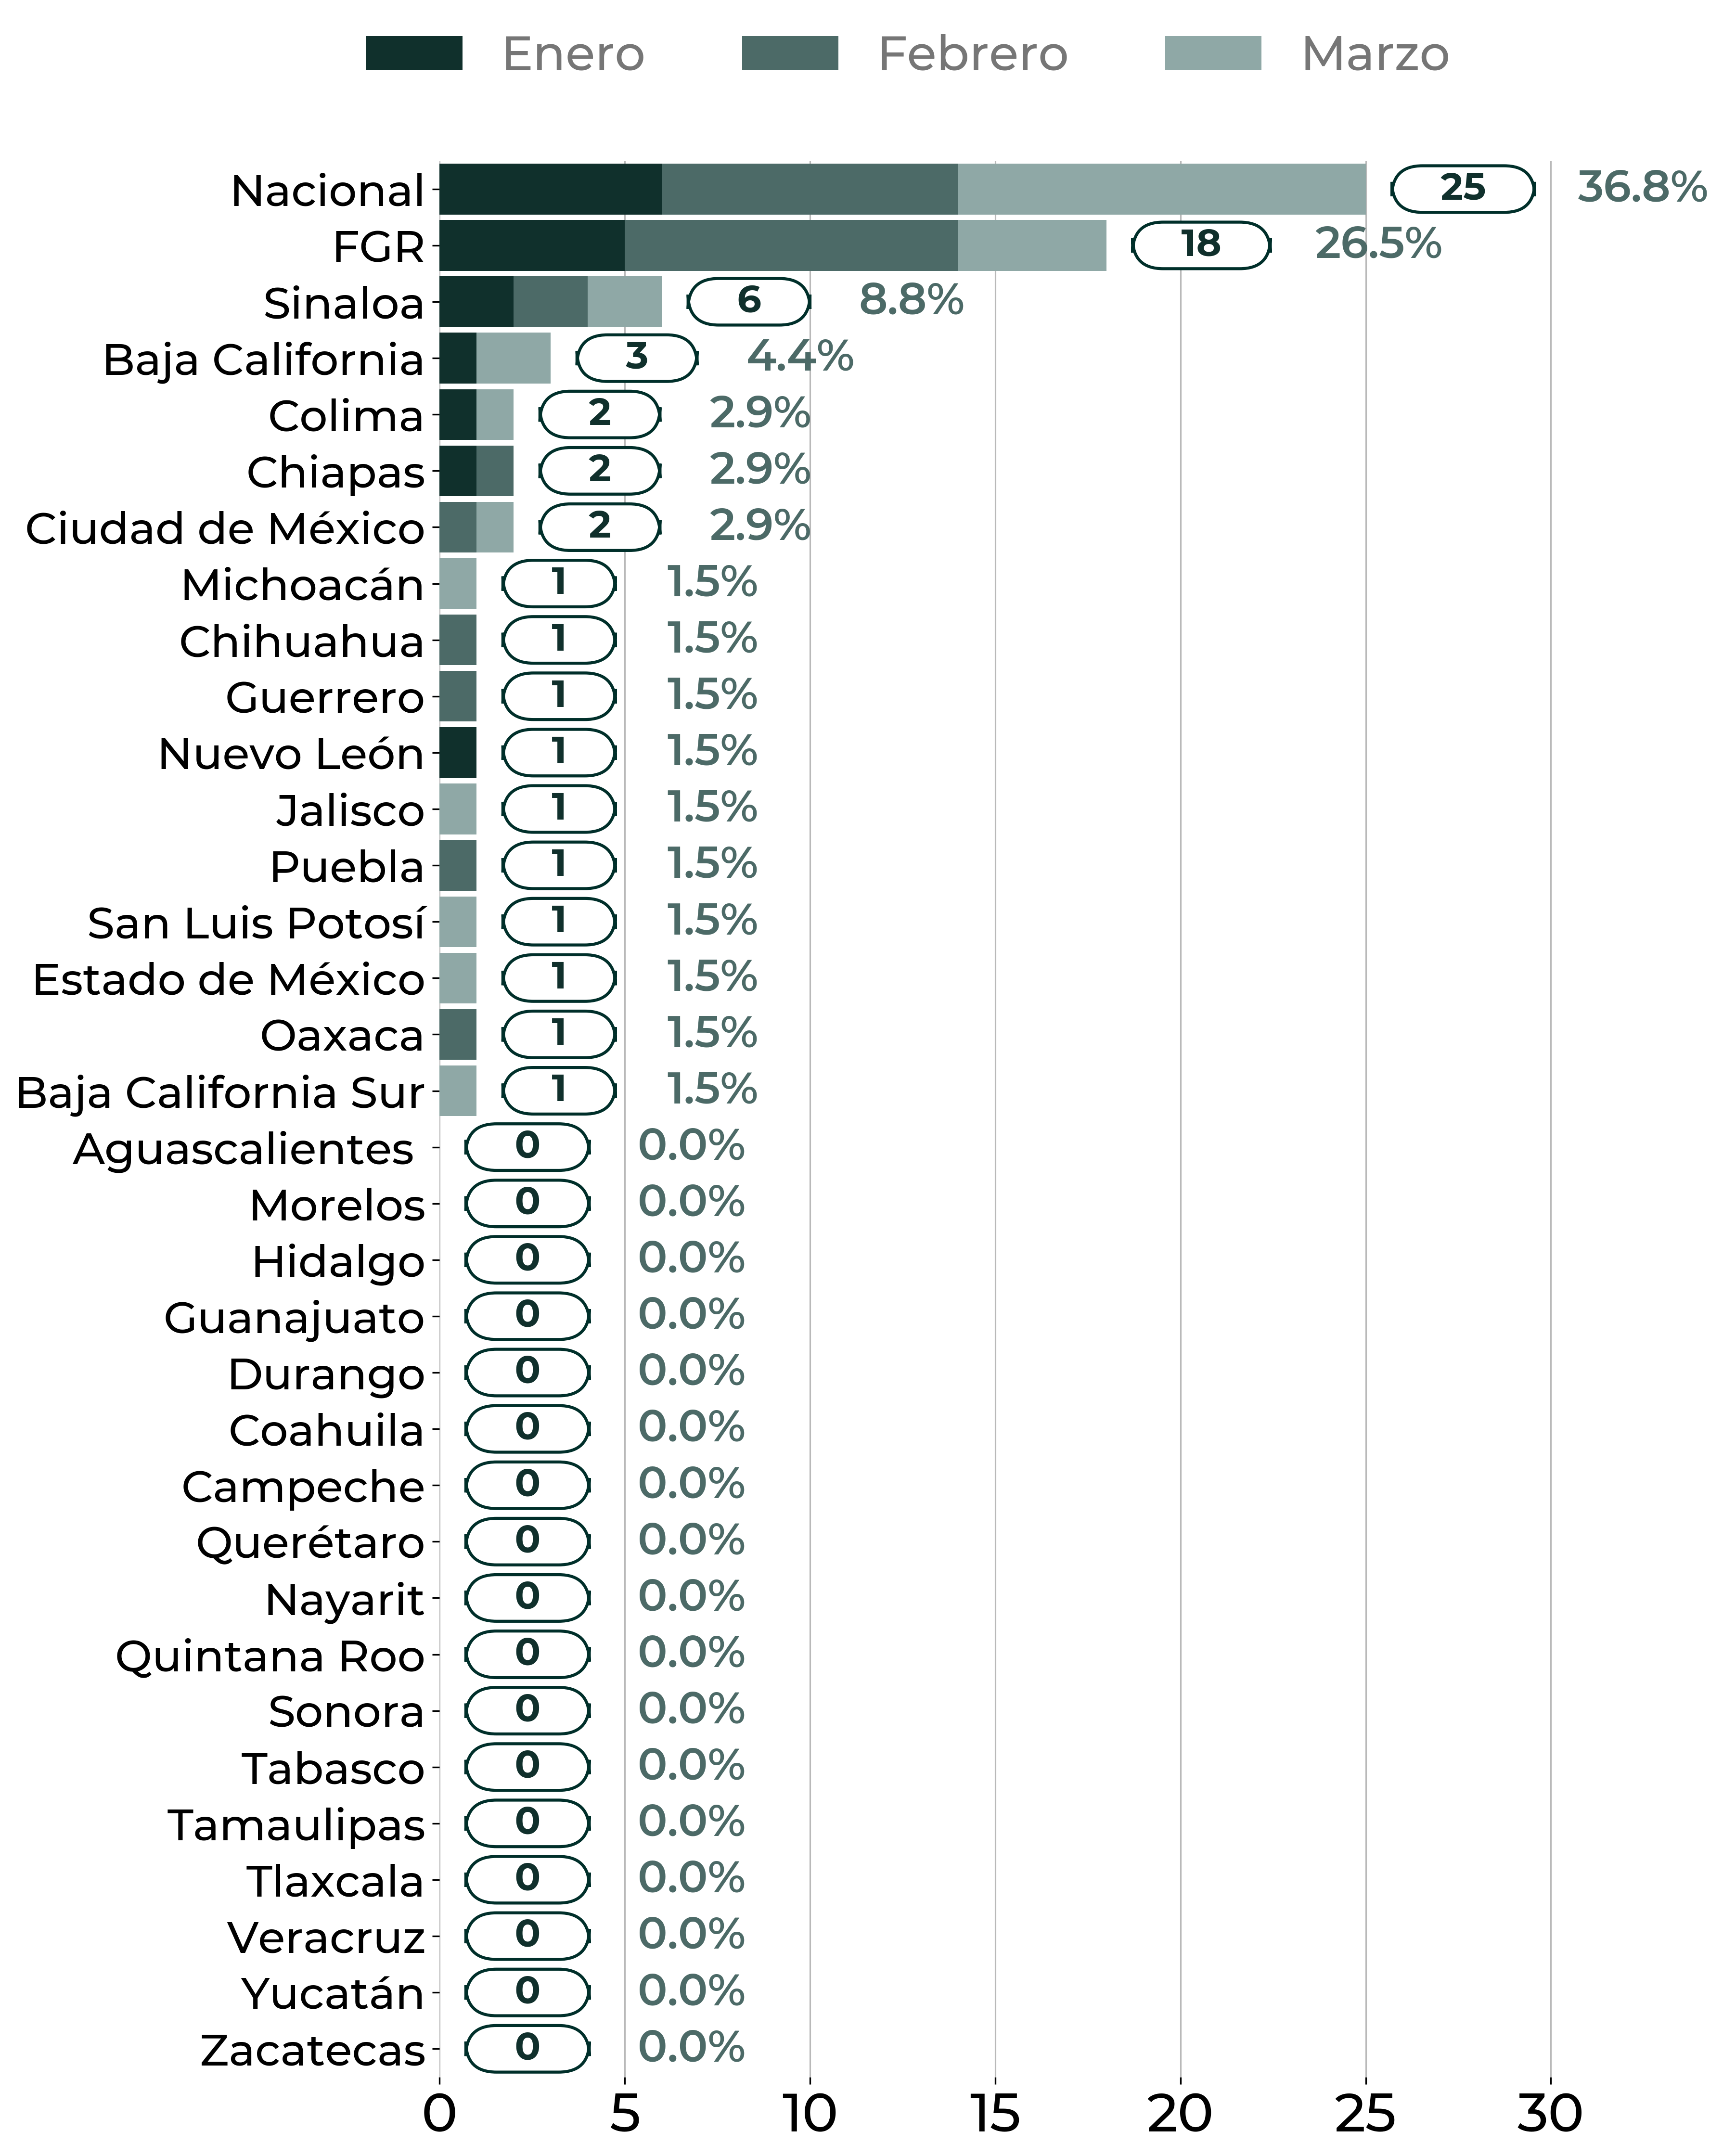

In [13]:
barras_apiladas_horizontales(forzada_delitos_long, nombre="forzada_delitos_long", bar_height=0.9, valor_barra=False, porcentaje_barra=False, porcentaje_total=True)